# 拉普拉斯嵌入法與譜分群

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

$\newcommand{\trans}{^\top}
\newcommand{\adj}{^{\rm adj}}
\newcommand{\cof}{^{\rm cof}}
\newcommand{\inp}[2]{\left\langle#1,#2\right\rangle}
\newcommand{\dunion}{\mathbin{\dot\cup}}
\newcommand{\bzero}{\mathbf{0}}
\newcommand{\bone}{\mathbf{1}}
\newcommand{\ba}{\mathbf{a}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bc}{\mathbf{c}}
\newcommand{\bd}{\mathbf{d}}
\newcommand{\be}{\mathbf{e}}
\newcommand{\bh}{\mathbf{h}}
\newcommand{\bp}{\mathbf{p}}
\newcommand{\bq}{\mathbf{q}}
\newcommand{\br}{\mathbf{r}}
\newcommand{\bx}{\mathbf{x}}
\newcommand{\by}{\mathbf{y}}
\newcommand{\bz}{\mathbf{z}}
\newcommand{\bu}{\mathbf{u}}
\newcommand{\bv}{\mathbf{v}}
\newcommand{\bw}{\mathbf{w}}
\newcommand{\tr}{\operatorname{tr}}
\newcommand{\nul}{\operatorname{null}}
\newcommand{\rank}{\operatorname{rank}}
%\newcommand{\ker}{\operatorname{ker}}
\newcommand{\range}{\operatorname{range}}
\newcommand{\Col}{\operatorname{Col}}
\newcommand{\Row}{\operatorname{Row}}
\newcommand{\spec}{\operatorname{spec}}
\newcommand{\vspan}{\operatorname{span}}
\newcommand{\Vol}{\operatorname{Vol}}
\newcommand{\sgn}{\operatorname{sgn}}
\newcommand{\idmap}{\operatorname{id}}
\newcommand{\am}{\operatorname{am}}
\newcommand{\gm}{\operatorname{gm}}
\newcommand{\mult}{\operatorname{mult}}
\newcommand{\iner}{\operatorname{iner}}$

In [ ]:
# from lingeo import random_int_list

## Main idea

Sometimes a graph can have some "clusters" such that the vertices in each cluster are strongly related, while vertices from different clusters are weakly related.  
The Laplacian matrix is good at find these clusters.

Let $G$ be a graph on $n$ vertices and $L$ its Laplacian matrix.  
Let $\lambda_1 \leq \cdots \leq \lambda_n$ be the eigenvalues.  
We knew that $\nul(L)$ is the lagest $k$ such that $\lambda_k = 0$, and it is also the number of connected components of $G$.  
Similarly, we may pick a threshold $\epsilon > 0$ such that eigenvalues with $\lambda < \epsilon$ is considered as zeroish eigenvalues.  
Then the largest $k$ such that $\lambda_k < \epsilon$ can be interpreted as the number of clusters.  

Let $\{\bv_1,\ldots, \bv_n\}$ be the corresponding orthonormal eigenbasis.  
We knew that $\bv_1 = \bone$.  
The unit eigenvector $\bv_2$ corresponding to $\lambda_2$ is called the **Fiedler vector**.

One may partition a graph by its Fiedler vector as follows:  

- Let $(\bv_2)_i$ be the $i$-th entry of the Fiedler vector $\bv_2$.  
- Let $N_+ = \{ i : (\bv_2)_i > 0\}$.
- Let $N_- = \{ i : (\bv_2)_i < 0\}$.
- Let $N_0 = \{ i : (\bv_2)_i = 0\}$.
- Then the graph can be partitioned either by $(N_+\cup N_0, N_-)$ or $(N_+, N_-\cup N_0)$.  

Let $G$ be a graph and $W$ a subset of vertices.  
Then the **induced subgraph** of $G$ on $W$ is denoted by $G[W]$ and is the graph on the vertex set $W$ and with all edges in $G$ whose both endpoints are in $W$.  

##### Fiedler's partition theorem (simple version)

Let $G$ be a connected graph and $L$ its Laplacian matrix.  
Assume the multiplicity of the second smallest eigenvalue $\lambda_2$ is $1$.  
Let $\bv=(v_0,\ldots,v_{n-1})$ be the eigenvector of $L$ with respect to $\lambda_2$.  
Let $N_+ = \{ i : (\bv_2)_i > 0\}$.  
Let $N_- = \{ i : (\bv_2)_i < 0\}$.  
Let $N_0 = \{ i : (\bv_2)_i = 0\}$.  
Then $G[N_+]$ and $G[N_0\cup N_-]$ are *connected* subgraphs of $G$.

From this point of view, the Fiedler vector assigns a number to each vertex, so it can be viewed as a feature vector.  
Indeed, one may use $\bv_3, \bv_4, \ldots$ as new feature vectors.  
This lead to the idea called the **spectral embedding** of a graph.  

##### Algorithm (spectral embedding)

Input: a graph $G$ on $n$ vertices, and the desired dimension $k$
Output: an $n\times k$ data matrix $Y$

1. Let $L = L(G)$.
2. Find a diagonal matrix $D$, whose diagonal entries are $\lambda_1 \leq \cdots \leq \lambda_d$, and an orthogonal matrix $Q$ such that $L = QDQ\trans$.  
3. Let $Y$ be the $n\times k$ matrix composed of the $2$-nd to the $(k+1)$-th columns of $Q$.  

The importance of spectral embedding is to provide a way to transform a graph data into a data matrix.  
Thus, one may use clustering algorithms, such as $k$-means, to cluster the vertices of the graph.  
The combination of spectral embedding and $k$-means is called the **spectral clustering** .

Finally, all the theories in 614 and 615 works for weighted graphs, where each edge $\{i,j\}$ is assigned with a positive weight $w_{ij}$.  
The **weighted Laplacian matrix** of a weighted graph is having $-w_{ij}$ on the edges and  

$$
    \sum_{ \substack{j \neq i\\\{j,i\}\in E(G)} } w_{ij}.
$$

on the $i,i$-entry.  

## Side stories

- $k$-means
- image segmentation

## Experiments

##### Exercise 1

執行以下程式碼。  

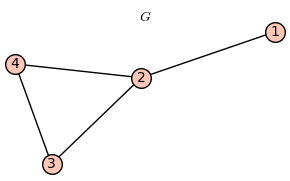

In [2]:
### code
set_random_seed(0)
print_ans = False

n = 4
g = graphs.RandomGNP(n, 0.5)
g.relabel({i:i + 1 for i in range(n)})

g.show(figsize=(3,3), title="$G$")

if print_ans:
    L = g.laplacian_matrix()
    pretty_print(LatexExpr("L ="), L)
    xs = var(" ".join("x%s"%i for i in g.vertices()))
    qua = sum((xs[e[0] - 1] - xs[e[1] - 1])^2 for e in g.edges(labels=False))
    print("quadratic form:")
    show(qua)
    print("ker(L) is spanned by the rows of")
    show(L.kernel().basis_matrix())
    print("Number of connected components =", L.nullity())

##### Exercise 1(a)

寫出圖 $G$ 的拉普拉斯矩陣 $L$。

##### Exercise 1(b)

寫出 $L$ 的二次型。

##### Exercise 1(c)

已知 $\bx\trans L\bx = 0$ 和 $L\bx = \bzero$ 等價。  
利用二次型求出 $\ker(L)$ 並判斷 $G$ 的連通區塊個數。

## Exercises

##### Exercise 2

令  

$$
    \begin{aligned}
    V &= \{1,2,3,4\} \\
    E &= \{\{1,2\}, \{1,3\}, \{1,4\}\}
    \end{aligned}
$$

且 $G = (V,E)$。

##### Exercise 2(a)

畫出圖 $G$。

##### Exercise 2(b)

寫出圖 $L = L(G)$ 以及其二次型。

##### Exercise 2(c)

說明 $L$ 是一個半正定矩陣，且 $L\bone = \bzero$。

##### Exercise 3

令  

$$
    \begin{aligned}
    V &= \{1,2,3,4\} \\
    E &= \{\{1,2\}, \{3,4\}\}
    \end{aligned}
$$

且 $G = (V,E)$。

##### Exercise 3(a)

畫出圖 $G$。

##### Exercise 3(b)

寫出圖 $L = L(G)$ 以及其二次型。

##### Exercise 3(c)

求 $\bx\trans L\bx = 0$ 的所有解。

##### Exercise 3(d)

已知 $\bx\trans L\bx = 0$ 和 $L\bx = \bzero$ 等價。  
利用二次型求出 $\ker(L)$ 並判斷 $G$ 的連通區塊個數。

##### Exercise 4

令 $G$ 為一圖、且 $L = L(G)$。  
以下練習探討 $\ker(L)$ 的結構。

##### Exercise 4(a)

令 $P$ 為任一半正定矩陣，證明 $\bx\trans P\bx = 0$ 和 $P\bx = \bzero$ 等價。  

提示：可利用瑞利商定理、或是利用格拉姆矩陣的特性。

##### Exercise 4(b)

求 $\bx\trans L\bx = 0$ 的解。

##### Exercise 4(c)

用上一提的結果說明 $\ker(L) = \{\phi_{X_1}, \ldots, \phi_{X_k}\}$。  
這裡 $X_1, \ldots, X_k$ 為 $G$ 的各連通區塊所在的點集合、  
而 $\phi_{X_1}, \ldots, \phi_{X_k}$ 為其指標向量（characteristic vector）。

##### Exercise 5

令 $G = (V,E)$ 為一圖、其中 $V = \{v_1,\ldots,v_n\}$、$E = \{e_1,\ldots,e_m\}$。  
定義 $\bu_j$ 為一 $\mathbb{R}^n$ 中的向量，  
其上有一個 $1$ 和一個 $-1$，分別落在 $e_j$ 的兩個端點上（哪一個放 $-1$ 皆可），  
而其它項皆是 $0$。

則 $G$ 的 **相連矩陣（incidence matrix）** 為一 $n\times m$ 矩陣 $N(G)$，  
其第 $j$ 行為 $\bu_j$。  

（相連矩陣並不唯一，取決於 $-1$ 放的位置，有 $2^m$ 種。）

##### Exercise 5(a)

令  

$$
    \begin{aligned}
    V &= \{1,2,3,4\} \\
    E &= \{\{1,2\}, \{1,3\}, \{1,4\}\}
    \end{aligned}
$$

且 $G = (V,E)$。  
寫出 $G$ 的一個相連矩陣 $N$，並驗證 $NN\trans = L(G)$。

##### Exercise 5(b)

令 $N$ 為 $G$ 的一個相連矩陣、  
而 $L$ 為 $G$ 的拉普拉斯矩陣。  

證明對任意 $G$ 都有 $NN\trans = L$。

##### Exercise 5(c)

利用 $NN\trans = L$ 來再次證明  

$$
    \bx\trans L\bx = \sum_{\{i,j\}\in E(G)}(x_i - x_j)^2.
$$

##### Exercise 6

令 $G$ 為一 $n$ 個點的圖而 $L = L(G)$。  
令 $L$ 的特徵值為 $\lambda_1 \leq \lambda_2 \leq \cdots \leq \lambda_n$。  
因為 $L\bone = \bzero$，所以 $\lambda_1$。  
而 $\lambda_2$ 則稱為 $G$ 的 **代數連通度（algebraic connectivity）** ，記作 $\lambda_2(G)$。

##### Exercise 6(a)

證明以下敘述等價：  

- $\lambda_2(G) = 0$。  
- $G$ 不連通。

##### Exercise 6(b)

圖 $G$ 的連通度指的是最少須要拿掉幾個點才能讓 $G$ 變得不連通，這個連通度記作 $\kappa(G)$。  
另一個 $\lambda_2(G)$ 被稱為代數連通度的原因是 $\lambda_2(G) \leq \kappa(G)$ 對任何圖 $G$ 都成立。  

令  

$$
    \begin{aligned}
    V &= \{1,2,3,4\} \\
    E &= \{\{1,2\}, \{2,3\}, \{3,4\}, \{4,1\}\}
    \end{aligned}
$$

且 $G = (V,E)$。  
計算 $G$ 的 $\lambda_2(G)$ 和 $\kappa(G)$。

##### Exercise 6(c)

令  

$$
    \begin{aligned}
    V &= \{1,2,3,4,5,6\} \\
    E &= \{\{1,2\}, \{2,3\}, \{3,4\}, \{4,5\}, \{5,6\}, \{6,1\}\}
    \end{aligned}
$$

且 $G = (V,E)$。  
計算 $G$ 的 $\lambda_2(G)$ 和 $\kappa(G)$。